# Amazon SageMaker Semantic Segmentation Algorithm - v9: train

post migration from [roofAI](https://github.com/kamangir/roofAI/tree/main/notebooks/sagemaker)

In [1]:
# !pip3 install 'sagemaker>=2,<3'

In [2]:
import sys
sys.path.append("../../")

from blueflow import notebooks

import sagemaker
import time

from blue_options import string
from blue_objects import path, objects


from blue_sandbox.sagesemseg.model import SageSemSegModel
from blue_sandbox import fullname
from blue_sandbox.logger import logger

logger.info(f"{fullname()}, built on {string.pretty_date()}")

/Users/kamangir/git/.venv/lib/python3.9/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config      - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config      - Not applying SDK defaults from location: /Users/kamangir/Library/Application Support/sagemaker/config.yaml


⚠️  sagemaker Couldn't call 'get_role' to get Role ARN from role name kamangir to get Role path.
📜  sagemaker role: arn:aws:iam::120429650996:role/service-role/AmazonSageMaker-ExecutionRole-20231022T170206
🌀  blue_sandbox-5.114.1, built on 12 January 2025, 14:22:39


In [3]:
dryrun = True

In [4]:
# sagesemseg upload_dataset - suffix=full-v2
dataset_object_name = "pascal-voc-v1-full-v2"

if dryrun:
    # sagesemseg upload_dataset - suffix=debug-v2 --count 16
    dataset_object_name = "pascal-voc-v1-debug-v2"

logger.info(f"dataset_object_name: {dataset_object_name}")
model_object_name = objects.unique_object("sagesemseg-model")

🌀  dataset_object_name: pascal-voc-v1-debug-v2
🌀  📂 sagesemseg-model-2025-01-12-14-22-39-APF3lL


In [5]:
model = SageSemSegModel()

sagemaker.image_uris Same images used for training and inference. Defaulting to image scope: inference.
sagemaker.image_uris Ignoring unnecessary instance type: None.
🌀  SageSemSegModel init took 024 millisecond(s), image: 469771592824.dkr.ecr.ca-central-1.amazonaws.com/semantic-segmentation:1


In [6]:
assert model.train(
    dataset_object_name=dataset_object_name,
    model_object_name=model_object_name,
)

🌀  SageSemSegModel.train: pascal-voc-v1-debug-v2 -> sagesemseg-model-2025-01-12-14-22-39-APF3lL
🌀  pascal-voc-v1-debug-v2.metadata: {
    "bucket": "kamangir",
    "channel": {
        "label_map": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/label_map/train_label_map.json",
        "train": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/train",
        "train_annotation": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/train_annotation",
        "validation": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/validation",
        "validation_annotation": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/validation_annotation"
    },
    "num": {
        "train": 16,
        "val": 16
    },
    "prefix": "bolt/pascal-voc-v1-debug-v2"
}
🌀  num_classes: 21
sagemaker.telemetry.telemetry_logging SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defa

2025-01-12 22:22:41 Starting - Starting the training job...
2025-01-12 22:23:04 Starting - Preparing the instances for training...
2025-01-12 22:23:35 Downloading - Downloading input data...
2025-01-12 22:23:55 Downloading - Downloading the training image...............
2025-01-12 22:26:32 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
Nvidia gpu devices, drivers and cuda toolkit versions (only available on hosts with GPU):
Sun Jan 12 22:26:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |          

sagemaker Creating model with name: sagesemseg-model-2025-01-12-14-22-39-AP-2025-01-12-22-28-10-945
sagemaker Creating endpoint-config with name sagesemseg-model-2025-01-12-14-22-39-AP-2025-01-12-22-28-10-945
sagemaker Creating endpoint with name sagesemseg-model-2025-01-12-14-22-39-AP-2025-01-12-22-28-10-945


-----------!

--2025-01-12 14:34:14--  https://github.com/kamangir/blue-bracket/raw/main/images/helmet-1.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kamangir/blue-bracket/main/images/helmet-1.jpg [following]
--2025-01-12 14:34:14--  https://raw.githubusercontent.com/kamangir/blue-bracket/main/images/helmet-1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1385654 (1.3M) [image/jpeg]
Saving to: ‘/Users/kamangir/storage/abcli/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/test.jpg’

     0K .......... .......... .......... .......... ..........  3% 2.11M 1s
    50K ..........

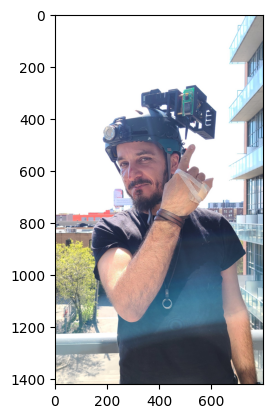

🌀  23 second(s) -> 1422x800:uint8: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20]


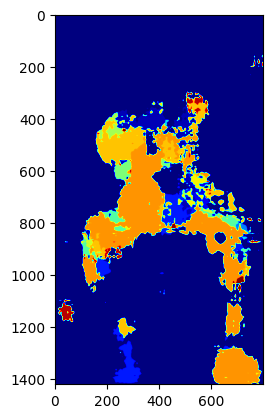

In [7]:
model.deploy(initial_instance_count=1, instance_type="ml.c5.xlarge")

In [8]:
# assert False
model.delete_endpoint()

sagemaker Deleting endpoint configuration with name: sagesemseg-model-2025-01-12-14-22-39-AP-2025-01-12-22-28-10-945
sagemaker Deleting endpoint with name: sagesemseg-model-2025-01-12-14-22-39-AP-2025-01-12-22-28-10-945


In [9]:
assert notebooks.upload(model_object_name)

upload: ../../../../storage/abcli/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/output.jpg to s3://kamangir/bolt/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/output.jpg
upload: ../../../../storage/abcli/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/test_resized.jpg to s3://kamangir/bolt/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/test_resized.jpg
upload: ../../../../storage/abcli/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/test.jpg to s3://kamangir/bolt/sagesemseg-model-2025-01-12-14-22-39-APF3lL/validation/test.jpg


🌀  ⏺️  sagesemseg-model-2025-01-12-14-22-39-APF3lL | 00001


🏃 View run sagesemseg-model-2025-01-12-14-22-39-APF3lL-00001 at: https://dbc-3ac1d106-bf0c.cloud.databricks.com/ml/experiments/4260976170545677/runs/c83feabc96254be587393a4ea783709c
🧪 View experiment at: https://dbc-3ac1d106-bf0c.cloud.databricks.com/ml/experiments/4260976170545677


🌀  ⏹️  sagesemseg-model-2025-01-12-14-22-39-APF3lL


In [10]:
# END